In [1]:
import gym
import math
import numpy as np
import matplotlib.pyplot as plt
from typing import Any

from plotting import action_map, plotting_q_values, save_map

In [2]:
class Agent:
    def __init__(self, env: gym.Env) -> None:
        self.env = env
        self.observations: int = self.env.observation_space.n
        self.actions: int = self.env.action_space.n
        self.gamma = 0.95
        self.alpha = 0.2
        self.state = self.env.reset()
        self.S = range(self.observations)
        self.A = range(self.actions)
        self.q_values = {s: {a: 0.0 for a in self.A} for s in self.S}

    def get_action(self, state: Any) -> Any:
        q_values = list(self.q_values[state].values()) # q_values umformen
        action = np.argmax(q_values).astype(int) # höchster q_value finden
        return action

    def get_random_action(self) -> Any:
        action = self.env.action_space.sample()
        return action

    def get_v_values(self, state: Any) -> float:
        return np.max(list(self.q_values[state].values())) # q_values umformen

    def get_sample(self) -> tuple: # Führt nun nur noch einen einzelnen Schritt aus
        old_state = self.state
        action = self.get_random_action()
        new_state, reward, done, _ = self.env.step(action)
        if done:
            self.state = self.env.reset()
        else:
            self.state = new_state
        return (old_state, action, reward, new_state) # sars'

    def compute_q_values(self, state: Any, action: Any, reward: float, state_next: Any) -> None:
        v_value_next = self.get_v_values(state_next)
        update_q_value = reward + self.gamma * v_value_next
        q_value_action = self.q_values[state][action] # Q Value für das, was wir schon ausgeführt haben
        new_q_value = (1.0 - self.alpha) * q_value_action + self.alpha * update_q_value
        self.q_values[state][action] = new_q_value

    def train(self, num_iterations: int) -> None:
        best_reward_mean = -np.inf
        for iteration in range(num_iterations):
            state, action, reward, next_state = self.get_sample()
            self.compute_q_values(state, action, reward, next_state)
            reward_mean = self.play(num_episodes=20, render=False)
            if iteration % 250 == 0: # Alle 250 Iterationen
                print(f"Iteration: {iteration}")
            if reward_mean > best_reward_mean:
                print(  f"Old best reward: {best_reward_mean}\n"
                        f"New best reward: {reward_mean}")
                best_reward_mean = reward_mean

    def play(self, num_episodes: int, render: bool = True) -> float:
        env = gym.make("FrozenLake-v1")
        reward_sum = 0.0
        if render:
            _, ax = plt.subplots(figsize=(8,8)) # Größe der Grafik
        for episode in range(num_episodes):
            state = env.reset()
            total_reward = 0.0

            while True:
                action = self.get_action(state)
                if render:
                    print(f"Action: {action_map(action)}")
                    plotting_q_values(state, action, self.q_values, ax)
                state, reward, done, _ = env.step(action)
                total_reward += reward
                if done:
                    reward_sum += total_reward
                    break
            if render:
                print(f"Episode: {episode} Total Reward: {total_reward}")
        env.close()
        return reward_sum / num_episodes

In [3]:
def main() -> None:
    env = gym.make("FrozenLake-v1")
    agent = Agent(env)
    agent.train(num_iterations=20_000)
    agent.play(num_episodes=5, render=True)
    save_map(agent.q_values, name="tabularq.png")

Iteration: 0
Old best reward: -infNew best reward: 0.0
Iteration: 250
Iteration: 500
Old best reward: 0.0New best reward: 0.1
Old best reward: 0.1New best reward: 0.2
Old best reward: 0.2New best reward: 0.35
Iteration: 750
Iteration: 1000
Old best reward: 0.35New best reward: 0.45
Old best reward: 0.45New best reward: 0.55
Iteration: 1250
Iteration: 1500
Iteration: 1750
Iteration: 2000
Iteration: 2250
Iteration: 2500
Iteration: 2750
Iteration: 3000
Iteration: 3250
Iteration: 3500
Iteration: 3750
Old best reward: 0.55New best reward: 0.6
Old best reward: 0.6New best reward: 0.7
Iteration: 4000
Iteration: 4250
Iteration: 4500
Iteration: 4750
Iteration: 5000
Iteration: 5250
Iteration: 5500
Iteration: 5750
Iteration: 6000
Iteration: 6250
Iteration: 6500
Iteration: 6750
Iteration: 7000
Iteration: 7250
Old best reward: 0.7New best reward: 0.75
Old best reward: 0.75New best reward: 0.8
Old best reward: 0.8New best reward: 0.85
Old best reward: 0.85New best reward: 0.9
Iteration: 7500
Old bes

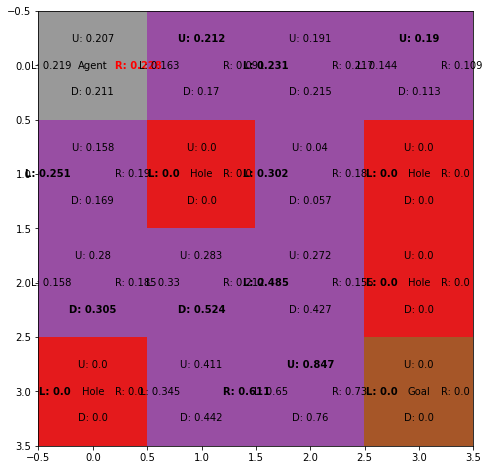

Action: Right
Action: Up
Action: Right
Action: Left
Action: Down
Action: Down
Action: Left
Action: Up
Episode: 0 Total Reward: 1.0
Action: Right
Action: Left
Action: Left
Action: Right
Action: Left
Action: Right
Action: Up
Action: Up
Action: Left
Action: Left
Action: Up
Action: Right
Action: Up
Action: Right
Action: Right
Action: Right
Action: Left
Action: Right
Action: Left
Action: Down
Action: Down
Action: Down
Action: Down
Action: Down
Action: Down
Episode: 1 Total Reward: 0.0
Action: Right
Action: Right
Action: Left
Action: Down
Episode: 2 Total Reward: 0.0
Action: Right
Action: Right
Action: Right
Action: Right
Action: Right
Action: Right
Action: Right
Action: Up
Action: Left
Action: Left
Episode: 3 Total Reward: 0.0
Action: Right
Action: Up
Action: Left
Action: Up
Action: Up
Action: Up
Action: Right
Action: Right
Action: Right
Action: Left
Action: Down
Episode: 4 Total Reward: 0.0


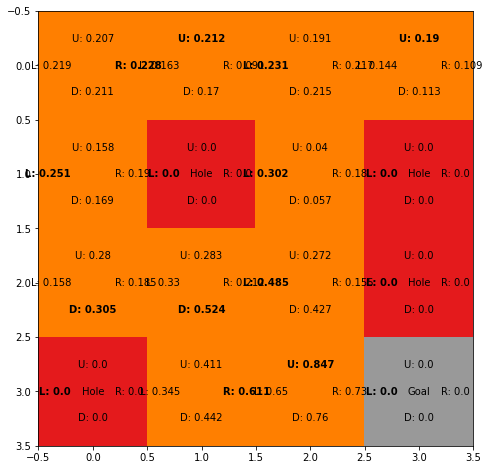

In [4]:
if __name__ == "__main__":
    main()